In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
ld = pd.read_csv('loan_data.csv') #data from lendingclub

In [5]:
ld.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [18]:
ld['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

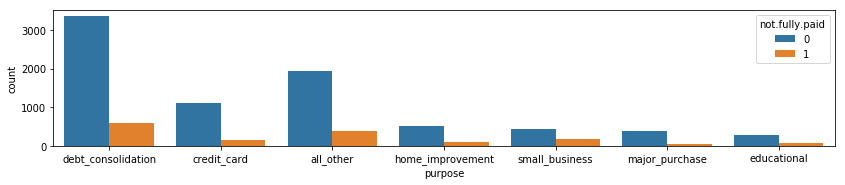

In [19]:
plt.figure(figsize=(14, 2.5))
sns.countplot('purpose',hue='not.fully.paid', data=ld)

In [33]:
a = ld['purpose'].value_counts()
b = ld[ld['not.fully.paid']==1]['purpose'].value_counts()
round(b/a*100, 2)

all_other             16.60
credit_card           11.57
debt_consolidation    15.24
educational           20.12
home_improvement      17.01
major_purchase        11.21
small_business        27.79
Name: purpose, dtype: float64

so, you may infer if somebody comes to you and ask for money to start a new small business, you should not lend the money!

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


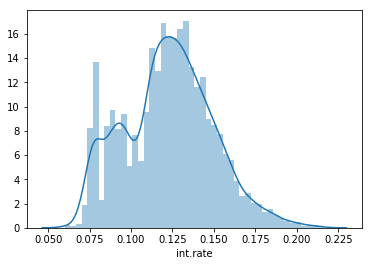

In [36]:
sns.distplot(ld['int.rate'])

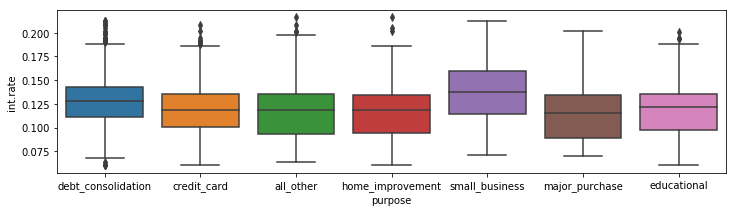

In [40]:
plt.figure(figsize=(12,3))
sns.boxplot(x='purpose', y='int.rate', data=ld)


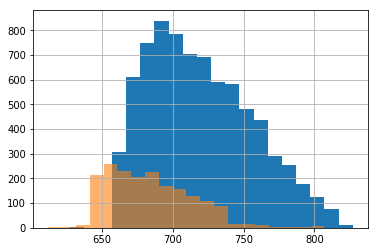

In [51]:
ld['fico'][ld['credit.policy'] == 1].hist(bins=20)
ld['fico'][ld['credit.policy'] == 0].hist(bins=20, alpha=0.6)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


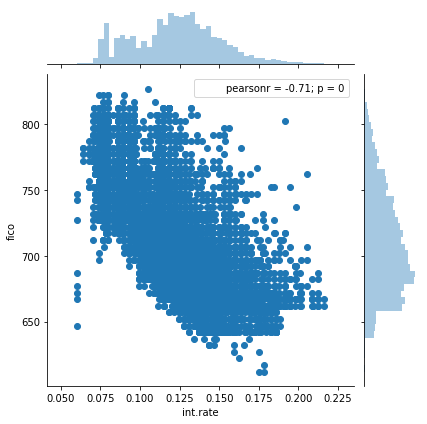

In [54]:
sns.jointplot('int.rate', 'fico', data=ld)

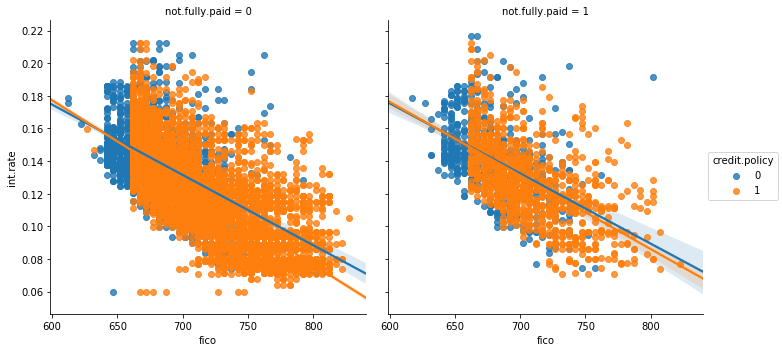

In [66]:
sns.lmplot(x='fico', y='int.rate', data=ld, hue='credit.policy', col='not.fully.paid')

In [70]:
ld_transformed = pd.get_dummies(data=ld, columns=['purpose'], drop_first=True)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = ld_transformed.drop('not.fully.paid', axis=1)
y = ld_transformed['not.fully.paid']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtc = DecisionTreeClassifier()

In [121]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
preds = dtc.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[2710  511]
 [ 475  136]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.85      3221
          1       0.21      0.22      0.22       611

avg / total       0.75      0.74      0.75      3832



In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc = RandomForestClassifier(1000, criterion='entropy')

In [127]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
pred_rf = rfc.predict(X_test)

In [129]:
print(confusion_matrix(y_test, pred_rf))
print('\n')
print(classification_report(y_test, pred_rf))

[[3217    4]
 [ 608    3]]


             precision    recall  f1-score   support

          0       0.84      1.00      0.91      3221
          1       0.43      0.00      0.01       611

avg / total       0.78      0.84      0.77      3832



Both are not very accurate. However, decision tree performed better than Random forest as far as class 1 recall is considered. In general, since the business has chosen to be on the safe side, they picked people who most probably pay back their loan and they did not risk to expand their eligibility criteria.
In other words, they are always sure the the guy will give back the money, and infact not only the money but also the interest!
Error in the features (e.g. cheating on reporting their income, etc.) or an unexpected event which is not present in the features might be the reason they could not return the money!
on the other hand "not fully paid" may not be a good indicator because some one may not return a penny while the other may return all except for a penny!!